<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

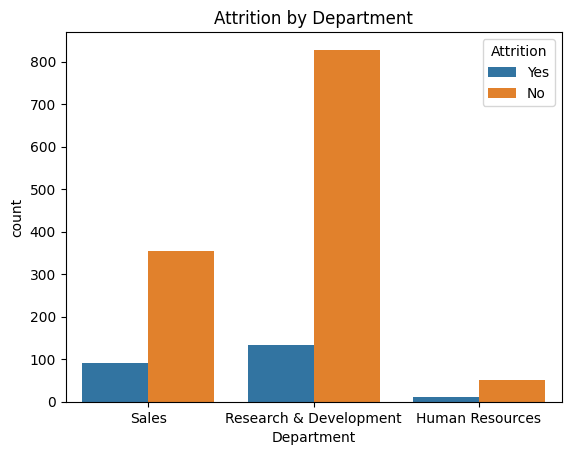

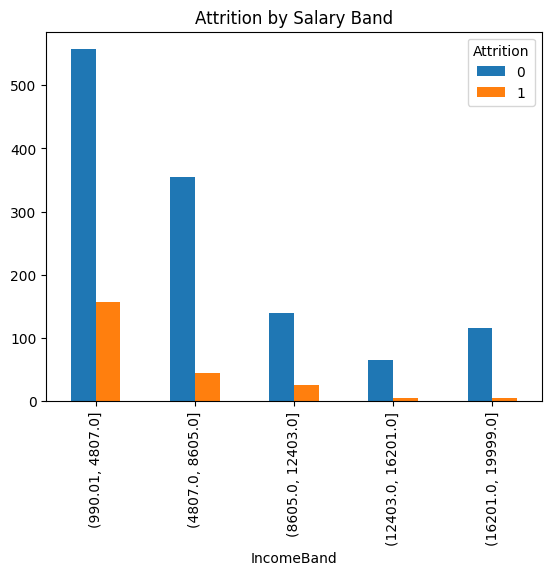

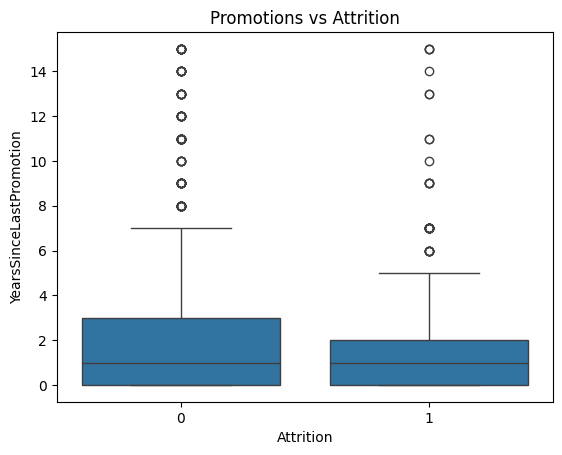

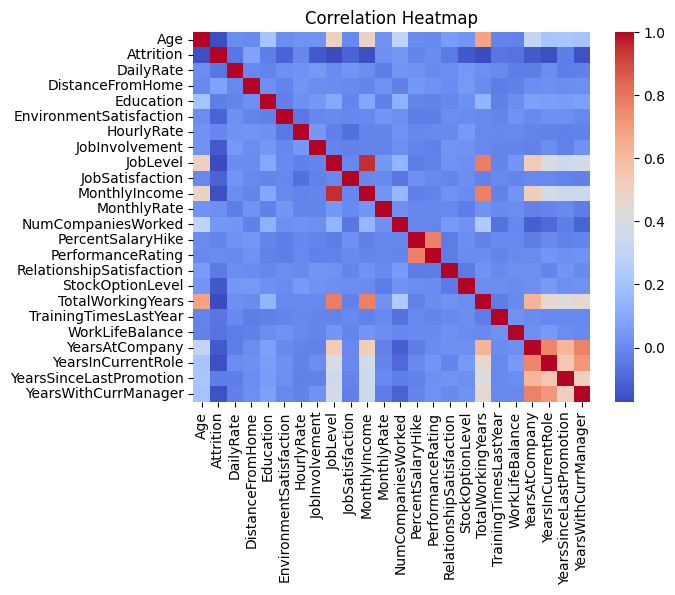

Accuracy: 0.8458049886621315
Confusion Matrix:
 [[361  19]
 [ 49  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.39      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.63      0.57      0.59       441
weighted avg       0.81      0.85      0.82       441



In [2]:
import pandas as pd
df = pd.read_csv("HR_dataset.csv")
df.head()
df.shape
df.info()
df.isnull().sum()
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df.drop(['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.countplot(x='Department', hue='Attrition', data=pd.read_csv('HR_dataset.csv'))
plt.title("Attrition by Department")
plt.show()
df['IncomeBand'] = pd.cut(df['MonthlyIncome'], bins=5)
pd.crosstab(df['IncomeBand'], df['Attrition']).plot(kind='bar')
plt.title("Attrition by Salary Band")
plt.show()
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title("Promotions vs Attrition")
plt.show()
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

from sklearn.model_selection import train_test_split
X = df.drop(['Attrition', 'IncomeBand'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



<Figure size 640x480 with 0 Axes>

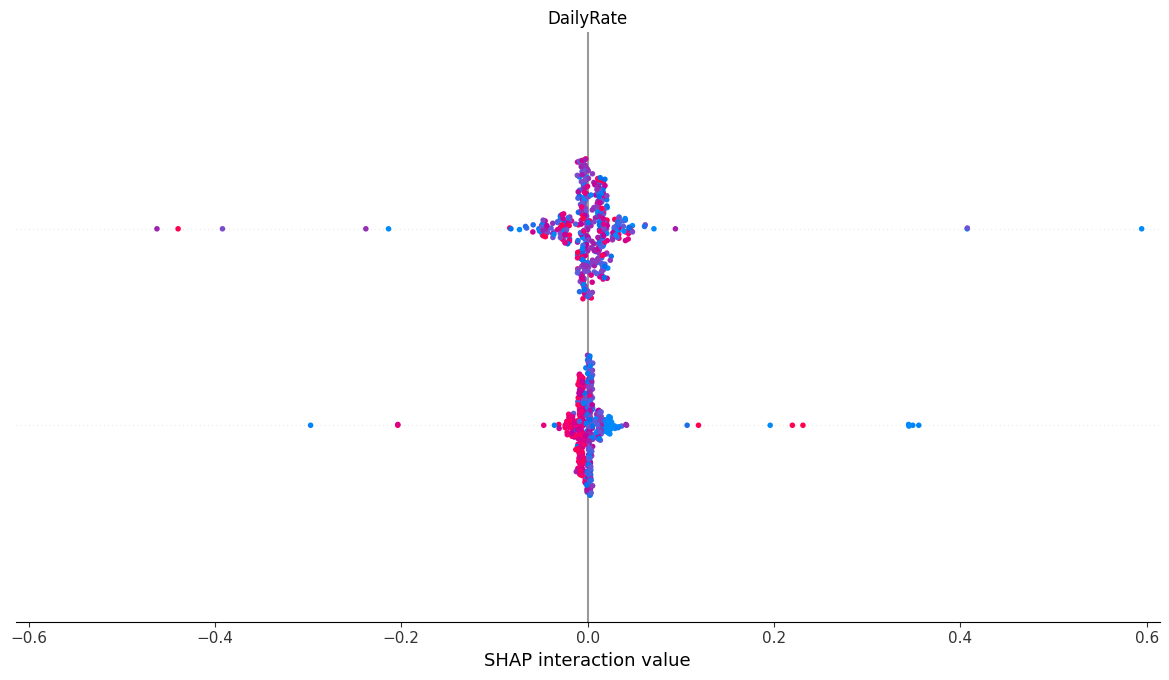

In [9]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)
    shap.plots.force(explainer.expected_value[1], shap_values[1][0], features=X_test.iloc[0].values, feature_names=X_test.columns.tolist())
else:
    shap.summary_plot(shap_values, X_test)


In [10]:

import joblib

X_test_copy = X_test.copy()
X_test_copy['Attrition'] = y_test.values
X_test_copy.to_csv("Cleaned_HR_Data.csv", index=False)
joblib.dump(model, "employee_attrition_model.pkl")

['employee_attrition_model.pkl']